In [1]:
from model.diffusion import FEADataset, Trainer

/home/namanwsl/code/fea-diffusion/model/diffusion.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [33]:
dataset = FEADataset(
    folder='data/feadata2500',
    augmentation=False,
    image_size=256,
    conditions_per_plate=4,
    num_steps=11,
)
print(len(dataset))

100000


In [10]:
# from tqdm.auto import tqdm
# startindex = 0
# errors = []
# for i in tqdm(range(startindex, len(dataset)), total=len(dataset), initial=startindex):
#     plate_index = (i // (dataset.samples_per_plate)) + 1
#     try:
#         x = dataset[i]
#     except Exception as e:
#         errors.append(plate_index) if plate_index not in errors else None

In [11]:
# print(len(errors))
# print(errors)

In [12]:
import torchvision.transforms.functional as TF
import torch
def unnormalize_from_negative_one_to_one(tensor):
        return (tensor + 1.0) / 2.0
def create_view_friendly_image(image):
        image = unnormalize_from_negative_one_to_one(image)
        # image = TF.invert(image)
        image = image * 255.0
        # image = image.repeat(3, 1, 1)
        # image = TF.to_pil_image(image, mode='F')
        return image

In [13]:
# import torchvision.transforms.functional as TF
# import torch
# def unnormalize_from_negative_one_to_one(tensor):
#         return (tensor + 1.0) / 2.0
# def create_view_friendly_image(image):
#         image = unnormalize_from_negative_one_to_one(image)
#         image = TF.invert(image)
#         image = image * 255.0
#         # image = image.repeat(3, 1, 1)
#         image = TF.to_pil_image(image)
#         return image

In [36]:
index = 1031
sample = dataset[index]
# for key, value in sample.items():
    # print(key, value.shape)
print(sample['plate_index'], sample['condition_index'], sample['iteration_index'])

tensor(26) tensor(4) tensor(2)


In [15]:
print(torch.unique(unnormalize_from_negative_one_to_one(sample['geometry'])))
print(unnormalize_from_negative_one_to_one(sample['geometry']))

tensor([0., 1.])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [16]:
# sample['geometry'] = (unnormalize_from_negative_one_to_one(sample['geometry']) > 0.5).float()

In [27]:
# sample['displacement'] = sample['displacement'] * (1.0 - unnormalize_from_negative_one_to_one(sample['constraints']))
 
# error = sample['displacement'] * (1.0 - unnormalize_from_negative_one_to_one(sample['constraints']))
sample['displacement'] = unnormalize_from_negative_one_to_one(sample['displacement']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['displacement'] = (sample['displacement'] * 2.0) - 1.0
sample['constraints'] = unnormalize_from_negative_one_to_one(sample['constraints']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['constraints'] = (sample['constraints'] * 2.0) - 1.0
sample['previous_iteration'] = unnormalize_from_negative_one_to_one(sample['previous_iteration']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['previous_iteration'] = (sample['previous_iteration'] * 2.0) - 1.0
# sample['displacement'] = sample['displacement'] - error

In [37]:
print(torch.unique(unnormalize_from_negative_one_to_one(sample['previous_iteration'])))

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

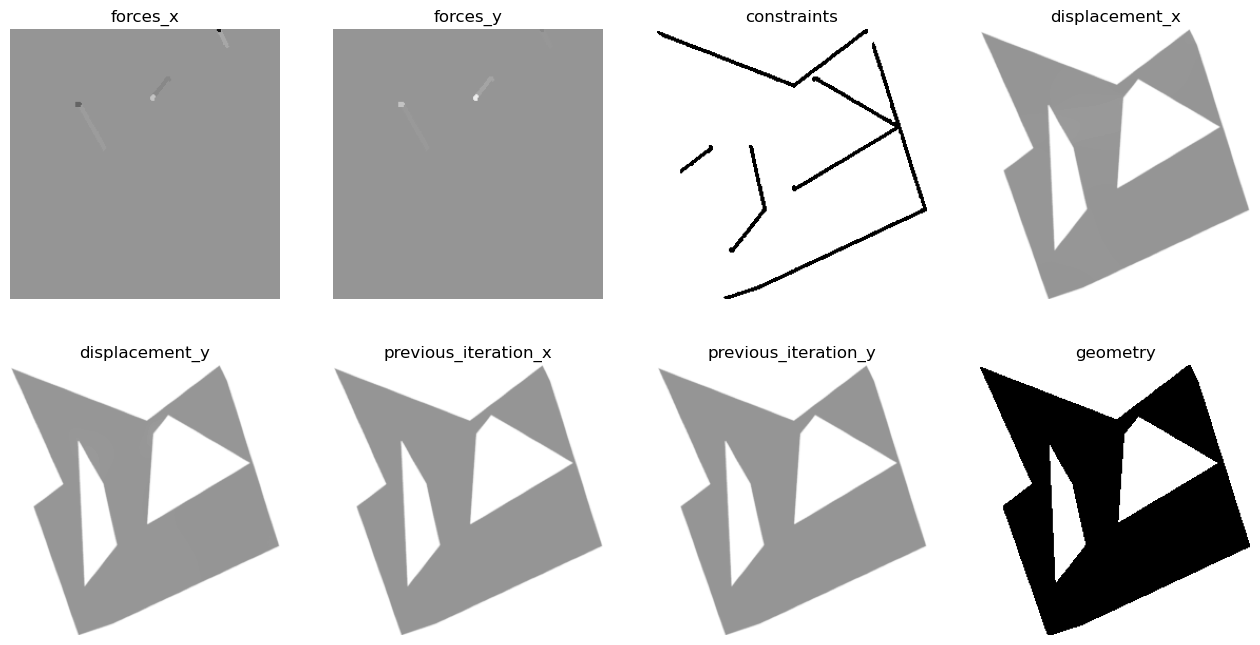

In [19]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16, 8))
index = 1
for key, value in reversed(sample.items()):
    if value.shape.numel() == 1:
        continue
    if value.shape[0] == 2:
        figure.add_subplot(2, 4, index)
        plt.title(key + "_x")
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[0][None, ...]))
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        figure.add_subplot(2, 4, index)
        plt.title(key + "_y")
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[1][None, ...]))
        plt.imshow(create_view_friendly_image(value[1][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
    else:
        figure.add_subplot(2, 4, index)
        plt.title(key)
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[0][None, ...]))
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        